# study03-1で生成したcsvファイルを読み込み、グラフ化する。
  - csvファイルをDataFrameに読みこむ。
  - DataFrame内にはYearフィールドがあり値が重複している。***groupby***でYearをユニークにし、データをまとめる。その際、他のフィールドは平均値としておく。
  - 先に作ったDataFrameを用いて***棒グラフ***を作図する。
  - 先に作ったDataFrameを用いて***seabornを使って散布図行列***を作図する。
  - 先に作ったDataFrameを用いて***相関係数***を求める。

---
## 1.  csvファイルを読み込む

In [1]:
import numpy as np
import glob
import pandas as pd
csv_JH = '.\\Data\\03_Sample\\JH.csv'

In [2]:
#ファイルを読み込み
df_JH = pd.read_csv(csv_JH, encoding='Shift_JISx0213')
display(df_JH.head(8))

,Region,Year,Koku,Su
0,1,2015,44.274370,42.969431
1,2,2015,45.618216,51.053328
2,3,2015,50.199653,47.755236
3,4,2015,45.344529,59.022431
4,1,2016,42.816303,53.701978
5,2,2016,55.219018,47.927848
6,3,2016,54.762744,45.458258
7,4,2016,46.966860,48.452898


---
## 2. Yearフィールドでグループ化し、平均値を求める。

In [3]:
df_JH_grp = df_JH.groupby(['Year']).mean()

---
## 3. 棒グラフ

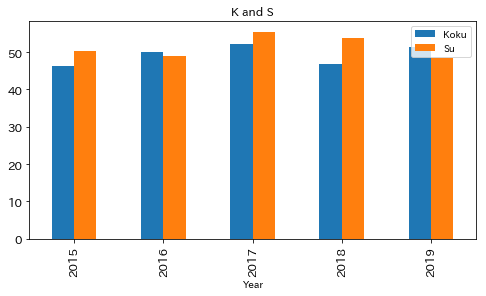

In [5]:
df_JH_grp[['Koku','Su']].plot(kind='bar', stacked=False,  title = "K and S", figsize=(8, 4), fontsize=12)

---
## 4. 散布図行列

<class 'seaborn.axisgrid.PairGrid'>


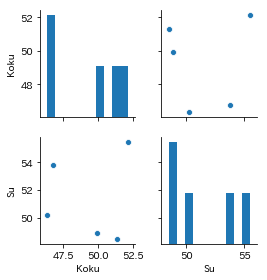

In [6]:
import seaborn as sns
pg = sns.pairplot(df_JH_grp[['Koku','Su']], height=2)
print(type(pg))

---
## 5. 相関係数

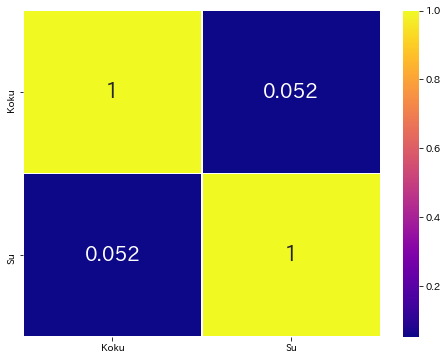

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df_JH_grp[['Koku','Su']].corr(), annot=True, annot_kws={"size": 20}, cmap='plasma', linewidths=.5) 